#  Предсказание найма кандитата на должность

## 1. Описание задания
На основании данный из  дата-сета (https://www.kaggle.com/shivan118/hranalysis?select=train.csv (test.csv - предварительно скачен)) необходимо определить (предсказать) факт найма потенциального сотрудника.

## 2. Описание предметной области

В общем случае на множесте данны определы 12(13*) признаков. Проведём описание столбцов таблицы:
1. employee_id = ID-записи в таблице;
2. department = наименование департамента, куда рассматривалась кандидатура потенциального сотрудника;
3. region = наименование (обезличенное) региона, откуда поступила кандидатура;
4. education = уровень образования кандидиата (бакалавр, магистр, и т.д.);
5. gender = пол (муж/жен) кандидата;
6. recruitment_channel = канал подбора персонала;
7. no_of_trainings = колличество пройденных тренингов;
8. age = возраст кандидата
9. previous_year_rating = прошлогодний рейтинг сотрудника (в компании);
10. length of service = стаж работы;
11. KPIs_met >80% = "ключевой показатель эффективности";
12. awards_won? = победитель номинаций/конкурсов;
13. avg_training_score = средняя оценка в рамках прохождений курсов;
14. is_promoted * = был ли нанят сотрудник (* - используется в тренировочной выборке).


In [112]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
# Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

In [113]:
# Считываем данные с локального файла
url = "train.csv"
data_raw=pd.read_csv(url)

In [114]:
# Узнаем размер таблицы
data_raw.shape

(54808, 14)

In [115]:
# Выведем первые 5 строк таблицы
data_raw.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


### Типы признаков (столбцов)
1. employee_id = числовой;
2. department = категориальный;
3. region = категориальный;
4. education = категориальный;
5. gender = бинарный;
6. recruitment_channel = категориальный;
7. no_of_trainings = числовой;
8. age = числовой;
9. previous_year_rating = числовой;
10. length of service = числовой;
11. KPIs_met >80% = бинарный;
12. awards_won? = бинарный;
13. avg_training_score = числовой;
14. is_promoted * = бинарный.

## 3. Визуализация данный и описательная статистика

In [116]:
data_raw.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [117]:
corr_mat = data_raw.corr()
corr_mat

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


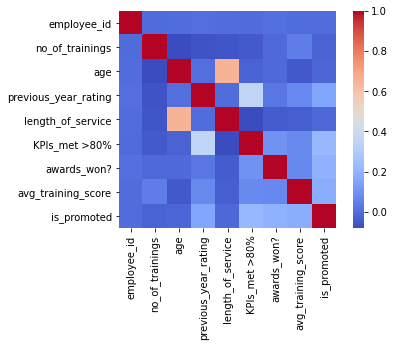

In [118]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Можно заметить, что есть несколько пар признаков, между которыми есть некая корреляция - {age,lenght_of_service} и {previous_year_rating, KPIs_met >80%}

### Рассмотрим визуализацию данных по отдельным признакам

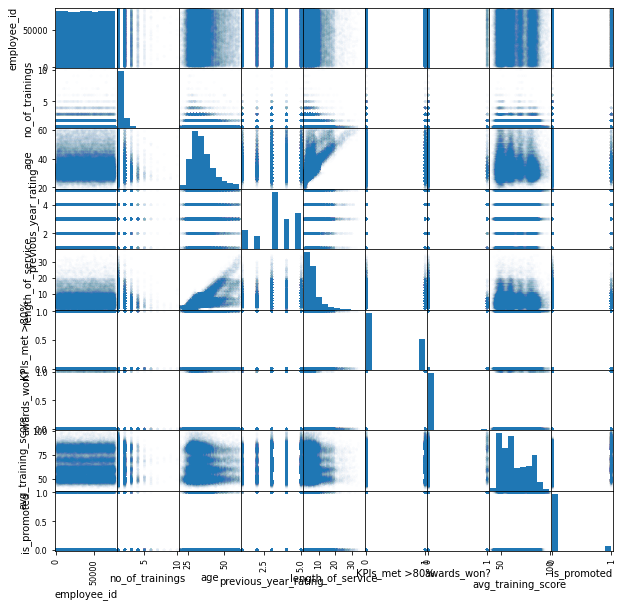

In [119]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_raw, alpha = .01, figsize = (10, 10))
pass

### Гендерное соотношение

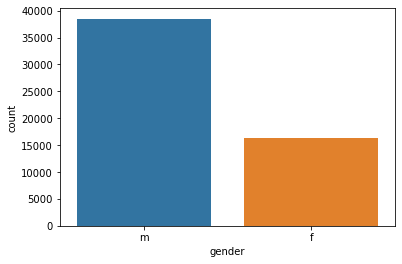

In [120]:
sns.countplot(x='gender', order=data_raw['gender'].value_counts().index, data=data_raw)
pass

Большинство кандидатов - мужчины.

### Прошлогодный рейтинг и средняя оценка на тренингах

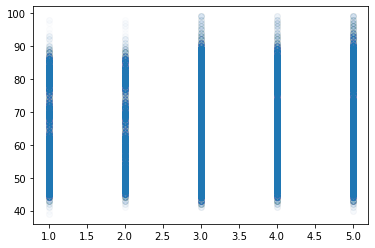

In [121]:
plt.scatter(data_raw['previous_year_rating'],data_raw['avg_training_score'], alpha=0.01)
pass

### Стаж и средняя оценка на треннингах

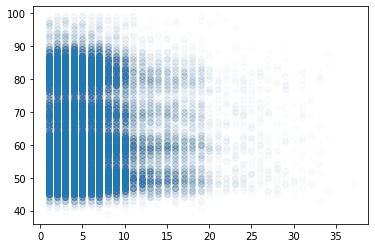

In [122]:
plt.scatter(data_raw['length_of_service'],data_raw['avg_training_score'], alpha=0.01)
pass

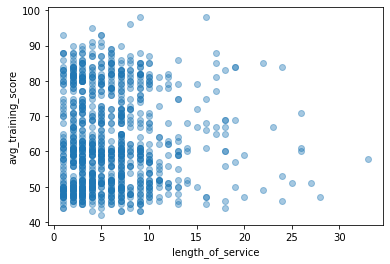

In [123]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)
plt.scatter(data_raw.iloc[random_subset]['length_of_service'], data_raw.iloc[random_subset]['avg_training_score'], alpha=0.4)
plt.xlabel('length_of_service')
plt.ylabel('avg_training_score')
pass

На диаграмме можно заметить крупное скопление точек на отрезке [0,10] по оси lenght_of_service (стаж работы), что можно трактовать следующим образом: большая часть кандидатов - это сотрудники со стажем меньше 10 лет.
При этом, второй признак (avg_training_score - среднее оценка пройденных курсов) - распределен в данной области почти равномерно.

### Стаж и возраст

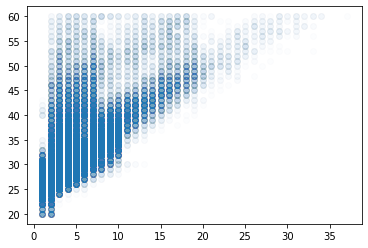

In [124]:
plt.scatter(data_raw['length_of_service'],data_raw['age'], alpha=0.01)
pass

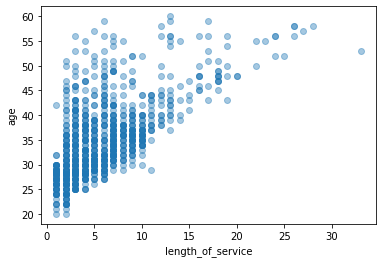

In [125]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)
plt.scatter(data_raw.iloc[random_subset]['length_of_service'], data_raw.iloc[random_subset]['age'], alpha=0.4)
plt.xlabel('length_of_service')
plt.ylabel('age')
pass

На диаграмме выше отоброжены точки, отображающие данные по двум признакам - стаж работы и возраст.но 
Не трудно заметить, что точки сгруппированы в верзнем левом углу таблицы. По сути, они ограничены главной диагональю, что не удивительно - человек иметь стаж, превышающий его возраст.

При этом, можно увидеть рядом с правой стороной диаграммы точку, которая сильно отедлена от остальных. Теоритически, можно приблизительно вычислить её координаты - [~40,53]. Т.е. данная запись говорит о том, что кандидат в возрасте 53-х лет имеет стаж около 40 лет. Следовательно, он начал работать в районе 13 лет.

Возможно, что была допущена ошибка при создании дата-сета или сохранения данных. Такого рода точка как раз отображает выброс данных.

## 4. Борьба с выбросами

In [126]:
data_raw['length_of_service'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     1.0
0.010     1.0
0.050     1.0
0.100     2.0
0.500     5.0
0.900    11.0
0.950    15.0
0.990    20.0
0.995    24.0
Name: length_of_service, dtype: float64

In [127]:
data_raw['age'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    22.0
0.010    23.0
0.050    25.0
0.100    27.0
0.500    33.0
0.900    46.0
0.950    51.0
0.990    58.0
0.995    59.0
Name: age, dtype: float64

In [128]:
rows_to_drop = data_raw[
    (data_raw['length_of_service'] < data_raw['length_of_service'].quantile(0.005)) | (data_raw['length_of_service'] > data_raw['length_of_service'].quantile(0.995)) | 
    (data_raw['age']  < data_raw['age' ].quantile(0.005)) | (data_raw['age']  > data_raw['age' ].quantile(0.995)) | 
    (data_raw['avg_training_score']  < data_raw['avg_training_score' ].quantile(0.005)) | (data_raw['avg_training_score']  > data_raw['avg_training_score' ].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(53695, 14)

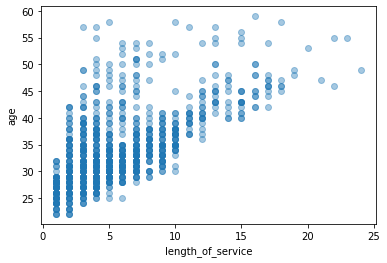

In [129]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
plt.scatter(data.iloc[random_subset]['length_of_service'], data.iloc[random_subset]['age'], alpha=0.4)
plt.xlabel('length_of_service')
plt.ylabel('age')
pass

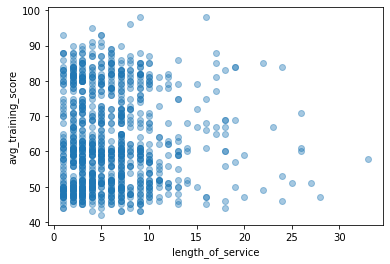

In [130]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)
plt.scatter(data_raw.iloc[random_subset]['length_of_service'], data_raw.iloc[random_subset]['avg_training_score'], alpha=0.4)
plt.xlabel('length_of_service')
plt.ylabel('avg_training_score')
pass

## 5. Подготовка данных


### Заполнение пропущенных значений

In [131]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education               2315
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    3982
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Как видно из результата - в дата-сете отсутсвуют записи по двум признакам: education (категориальный) - 2315 записей и previous_year_rating (числовой) - 3982.

Всего в тренировочоном дата сете представлено около 52 тысяч записей - 2315+3982= записи это ~12%.
Есть два пути решения - или заполнить данные средним или медианной, или удалим эти строки. Второй вариант возможен, но идти этим путем не интересно :)

Попробуем заполнить их медианной (для числового признака):

In [132]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)
data.isna().sum()

employee_id                0
department                 0
region                     0
education               2315
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Столбец с категориальным признаком заполним модой:

In [133]:
data['education'].fillna(data['education'].mode().iloc[0], inplace=True)
data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [134]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,53695.000000,53695.000000,53695.000000,53695.000000,53695.000000,53695.000000,53695.000000,53695.000000,53695.000000
mean,39185.435515,1.253841,34.678555,3.303287,5.767148,0.352174,0.022293,63.392066,0.082224
std,22595.327963,0.609429,7.367058,1.215134,3.994236,0.477652,0.147635,13.190104,0.274708
min,1.000000,1.000000,22.000000,1.000000,1.000000,0.000000,0.000000,44.000000,0.000000
25%,19657.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39187.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58740.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,59.000000,5.000000,24.000000,1.000000,1.000000,94.000000,1.000000


### Бинаризация номинальных признаков
Признаки:
KPIs_met >80% = бинарный;
awards_won? = бинарный;
is_promoted = бинарный;
gender = бинарный

In [135]:
data['KPIs_met >80%'] = pd.factorize(data['KPIs_met >80%'])[0]
data['awards_won?'] = pd.factorize(data['awards_won?'])[0]
data['is_promoted'] = pd.factorize(data['is_promoted'])[0]
data['gender'] = pd.factorize(data['gender'])[0]

### Бинаризация категориальных признаков
Признаки:
department;
region;
education;
gender;
recruitment_channel.


In [136]:
department_dummies = pd.get_dummies(data['department'])
data = pd.concat((data, department_dummies), axis=1)
data = data.drop(['department'], axis=1)
department_dummies.head()

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1


In [137]:
region_dummies = pd.get_dummies(data['region'])
data = pd.concat((data, region_dummies), axis=1)
data = data.drop(['region'], axis=1)
region_dummies.head()

,region_1,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
education_dummies = pd.get_dummies(data['education'])
data = pd.concat((data, education_dummies), axis=1)
data = data.drop(['education'], axis=1)
education_dummies.head()

,Bachelor's,Below Secondary,Master's & above
0,0,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [139]:
recruitment_channel_dummies = pd.get_dummies(data['recruitment_channel'])
data = pd.concat((data, recruitment_channel_dummies), axis=1)
data = data.drop(['recruitment_channel'], axis=1)
recruitment_channel_dummies.head()

,other,referred,sourcing
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


### Нормализация колличественных признаков

In [140]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand.describe()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_6,region_7,region_8,region_9,Bachelor's,Below Secondary,Master's & above,other,referred,sourcing
count,5.369500e+04,5.369500e+04,5.369500e+04,5.369500e+04,5.369500e+04,5.369500e+04,5.369500e+04,5.369500e+04,5.369500e+04,5.369500e+04,...,5.369500e+04,5.369500e+04,5.369500e+04,5.369500e+04,5.369500e+04,5.369500e+04,5.369500e+04,5.369500e+04,5.369500e+04,5.369500e+04
mean,2.249600e-17,-1.249396e-16,2.230269e-15,-6.283786e-16,-1.929950e-15,1.326344e-16,2.375230e-16,1.001266e-15,3.361167e-17,-2.212128e-15,...,-4.279202e-16,1.626711e-15,4.197447e-16,-6.483782e-16,7.007958e-16,-3.564925e-15,1.258105e-15,7.660942e-16,2.630568e-15,2.052657e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.734183e+00,-1.536054e+00,-4.165230e-01,-1.720979e+00,-1.895500e+00,-1.193507e+00,-1.356270e+00,-1.509982e-01,-1.470198e+00,-2.993133e-01,...,-1.133377e-01,-3.123127e-01,-1.106094e-01,-8.868234e-02,-1.585857e+00,-1.161697e-01,-6.099784e-01,-1.116652e+00,-1.469489e-01,-8.578081e-01
25%,-8.642687e-01,-1.536054e+00,-4.165230e-01,-7.708036e-01,-2.495914e-01,-6.927853e-01,-1.356270e+00,-1.509982e-01,-9.394972e-01,-2.993133e-01,...,-1.133377e-01,-3.123127e-01,-1.106094e-01,-8.868234e-02,-1.585857e+00,-1.161697e-01,-6.099784e-01,-1.116652e+00,-1.469489e-01,-8.578081e-01
50%,6.923930e-05,6.510065e-01,-4.165230e-01,-2.278460e-01,-2.495914e-01,-1.920637e-01,7.373025e-01,-1.509982e-01,-2.571675e-01,-2.993133e-01,...,-1.133377e-01,-3.123127e-01,-1.106094e-01,-8.868234e-02,6.305619e-01,-1.161697e-01,-6.099784e-01,8.955175e-01,-1.469489e-01,-8.578081e-01
75%,8.654251e-01,6.510065e-01,-4.165230e-01,5.865903e-01,5.733628e-01,3.086579e-01,7.373025e-01,-1.509982e-01,9.558631e-01,-2.993133e-01,...,-1.133377e-01,-3.123127e-01,-1.106094e-01,-8.868234e-02,6.305619e-01,-1.161697e-01,1.639372e+00,8.955175e-01,-1.469489e-01,1.165740e+00
max,1.731002e+00,6.510065e-01,1.435140e+01,3.301378e+00,1.396317e+00,4.564791e+00,7.373025e-01,6.622474e+00,2.320523e+00,3.340919e+00,...,8.823029e+00,3.201860e+00,9.040656e+00,1.127599e+01,6.305619e-01,8.607934e+00,1.639372e+00,8.955175e-01,6.804962e+00,1.165740e+00


## Отбор признаков

In [141]:
data_stand.columns

Index(['employee_id', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'Analytics',
       'Finance', 'HR', 'Legal', 'Operations', 'Procurement', 'R&D',
       'Sales & Marketing', 'Technology', 'region_1', 'region_10', 'region_11',
       'region_12', 'region_13', 'region_14', 'region_15', 'region_16',
       'region_17', 'region_18', 'region_19', 'region_2', 'region_20',
       'region_21', 'region_22', 'region_23', 'region_24', 'region_25',
       'region_26', 'region_27', 'region_28', 'region_29', 'region_3',
       'region_30', 'region_31', 'region_32', 'region_33', 'region_34',
       'region_4', 'region_5', 'region_6', 'region_7', 'region_8', 'region_9',
       'Bachelor's', 'Below Secondary', 'Master's & above', 'other',
       'referred', 'sourcing'],
      dtype='object')

In [142]:
X = data_stand.drop(['employee_id', 'is_promoted'], axis=1)
y = data['is_promoted']

Разобъем данные на обучаемую и тестовую выборку:

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(40271, 13424)

Из библиотеки sklearn создаем модель для метода K-neighbors (к-ближайших соседей) и обучаем её:

In [144]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

На обученную модель подаем _обучаемую_ выборку и вычисляем ошибку:

In [145]:
y_train_predict = knn.predict(X_train)
err_test_1  = np.mean(y_train  != y_train_predict)
err_test_1

0.07911400263216707

На обученную модель подаем _тестовую_ выборку и вычисляем ошибку:

In [146]:
y_test_predict = knn.predict(X_test)
err_test_2  = np.mean(y_test  != y_test_predict)
err_test_2

0.0814958283671037

Пробуем изменить параметр метода k-ближайших соседей:

In [150]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
err_test_1  = np.mean(y_train  != y_train_predict)
print(err_test_1)

y_test_predict = knn.predict(X_test)
err_test_2  = np.mean(y_test  != y_test_predict)
print(err_test_2)

0.0002234858831417149
0.11166567342073898


In [147]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
err_test_1  = np.mean(y_train  != y_train_predict)
print(err_test_1)

y_test_predict = knn.predict(X_test)
err_test_2  = np.mean(y_test  != y_test_predict)
print(err_test_2)

0.06394179434332398
0.08469904648390941


In [148]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
err_test_1  = np.mean(y_train  != y_train_predict)
print(err_test_1)

y_test_predict = knn.predict(X_test)
err_test_2  = np.mean(y_test  != y_test_predict)
print(err_test_2)

0.0736261826127983
0.08566746126340882


In [149]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
err_test_1  = np.mean(y_train  != y_train_predict)
print(err_test_1)

y_test_predict = knn.predict(X_test)
err_test_2  = np.mean(y_test  != y_test_predict)
print(err_test_2)

0.07973479675200516
0.08008045292014303


## Выводы

В рамках данной работы были изучено:
1. Работа с библиотеками для Python и машинного обучения;
2. Методы визуализации данных;
3. Методы визуализации корреляции данных;
4. Способы борьбы с выбросами;
5. Подготовка данных: заполнение не введеных данных, бинаризация данных, разбиение данных на выборки;
6. Использование метода "k-ближаших соседей".

Касательно метода "k-ближаших соседей": были опыты с изменением параметров модели (2,5,10,15) и с запуском обученной модели на "тестовой" и "обучаемой" выборке.

| тип выборки || Параметр модели || Ошибка |
| --- || --- || --- |
| train || 1 || ~0.0002 |
| train || 2 || ~0.064 |
| train || 5 || ~0.073 |
| train || 10 || ~0.079 |
| train || 15 || ~0.080 |
|  ||  ||  |
| test || 2 || ~0.111 |
| test || 2 || ~0.084 |
| test || 5 || ~0.085 |
| test || 10 || ~0.081 |
| test || 15 || ~0.080 |

Исходя из данных таблицы можно сделать следующие выводы: 
1. При запуске модели на _тренировочной выборке_ с уменьшением параметра модели _ошибка уменьшается_, что не удивительно, так как с уменьшением параметра поведение модели стремится к полному перебору данных из _тренировочной_ выборки.
2. При запуске модели на _тестовой выборке_ с _увеличением_ параметра модели _ошибка уменьшается_ - чем больше объектов мы берем в рассмотрение тем более точно определяется отношение объекта к одному из двух классов (в терминах предметной области - будет ли кандидат с "такими-то" данными нанят или нет).